In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train_dataset_preprocessed.csv')
data

,id,team_a_mot_x_pos,team_b_mot_x_pos,team_a_ppg_dif_l4,team_a_ppg_dif_l6,team_b_ppg_dif_l4,team_b_ppg_dif_l6,team_a_ratio_shotsOnTarget_overall,team_a_ratio_shotsOnTarget_l4,team_a_ratio_shotsOnTarget_l6,...,team_a_shots_overall_TSR,team_b_shots_overall_TSR,team_a_shots_overall_l4_TSR,team_b_shots_overall_l4_TSR,team_a_shots_overall_l6_TSR,team_b_shots_overall_l6_TSR,odds_ft_1,odds_ft_x,odds_ft_2,Outcome
0,2215,-1.275790,-1.403450,-0.358936,-0.236495,-0.255679,-0.226892,1.547374,0.911481,1.101517,...,0.165227,-0.165175,0.231003,-0.230831,0.149022,-0.148900,-0.091460,-0.023157,0.037143,1
1,2216,-1.275790,-1.318169,0.509232,-0.236495,-0.581872,-0.226892,-0.611188,-0.015057,-0.472370,...,-1.306757,1.306850,-1.603047,1.603212,-1.032534,1.032630,0.289390,0.498795,-0.225744,2
2,2217,-1.403623,-1.446091,8.322747,-0.236495,0.152062,-0.226892,0.040486,0.155312,0.002789,...,-2.337146,2.337268,-2.182221,2.182383,-1.859624,1.859700,0.371935,0.606046,-0.231643,2
3,2218,-1.190568,-1.488732,0.509232,-0.236495,0.233610,-0.226892,0.047002,-0.810103,0.007541,...,-1.159559,1.159648,-0.734287,0.734455,-0.914379,0.914477,-0.025261,-0.337759,-0.111152,1
4,2219,-1.361012,-1.446091,-0.793020,-0.236495,-0.255679,-0.226892,1.221864,1.381518,0.864176,...,1.195615,-1.195593,1.003234,-1.003060,0.976112,-0.975971,-0.053865,-0.223358,-0.075764,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57778,2982685,1.025207,0.558018,-0.453393,-0.030524,-0.610414,0.144105,-1.378457,0.569065,-0.336857,...,-0.570765,0.570837,-0.541229,0.541397,-0.678067,0.678171,-0.036703,-0.452160,-0.119578,1
57779,2982686,1.025207,-0.209513,0.220132,-0.166330,-0.507313,-0.465860,-0.924115,-1.361764,-1.653294,...,0.901218,-0.901188,-0.830816,0.830983,-0.796223,0.796324,-0.065307,-0.523660,-0.026893,0
57780,2982687,0.386041,-0.209513,-0.548941,-0.510595,0.763674,0.196326,-1.241551,0.453599,0.211494,...,0.165227,-0.165175,-0.444700,0.444869,-0.441756,0.441865,-0.044875,-0.487910,-0.094301,1
57781,2982688,-0.082680,0.856502,-0.334627,-0.125587,-0.149667,0.796087,-0.756094,-0.342876,-1.058743,...,-0.129170,0.129230,0.906705,-0.906531,0.267178,-0.267053,-0.034251,-0.344909,-0.133902,0


Outcome                               1.000000
team_b_shots_overall_TSR              0.245185
predict_xg_overall_team_b             0.229047
predict_xg_away_team_b                0.218892
team_b_shots_overall_l6_TSR           0.187846
position_a_prematch                   0.172142
team_b_shots_overall_l4_TSR           0.154225
team_b_shots_average                  0.145382
team_b_shots_average_l6               0.101064
team_b_shots_average_l4               0.097027
team_b_xg_last4_prematch              0.094263
team_a_xga_last4_prematch             0.086321
odds_ft_1                             0.075086
team_a_ppg_dif_l6                     0.055254
team_a_ppg_dif_l4                     0.039343
team_b_mot_x_pos                      0.018955
team_b_ratio_shotsOnTarget_overall    0.018393
team_b_ratio_shotsOnTarget_l6         0.014008
id                                    0.011534
team_b_ratio_shotsOnTarget_l4         0.005399
division                              0.004290
team_a_mot_x_

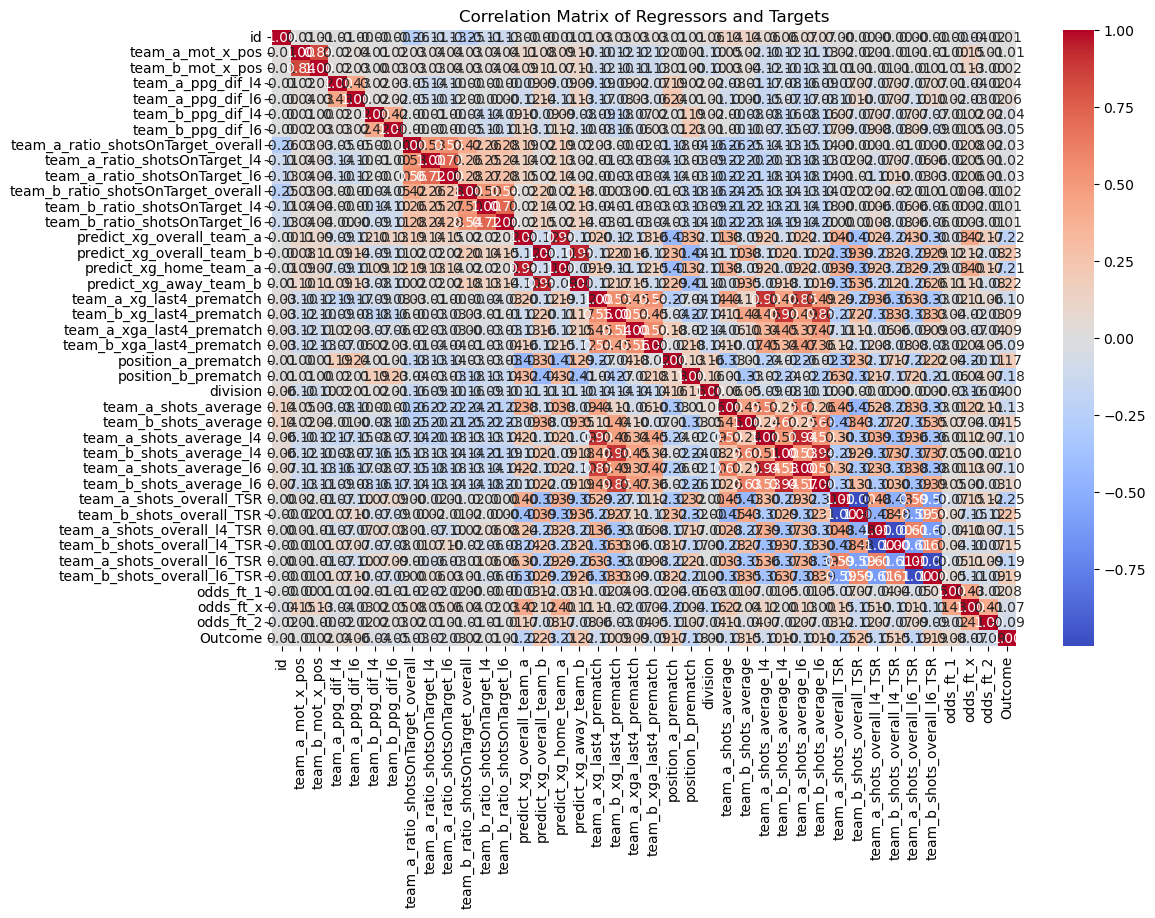

In [3]:
correlation_matrix = data.corr()

most_correlated = correlation_matrix['Outcome'].sort_values(ascending=False)
print(most_correlated)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Regressors and Targets")
plt.show()

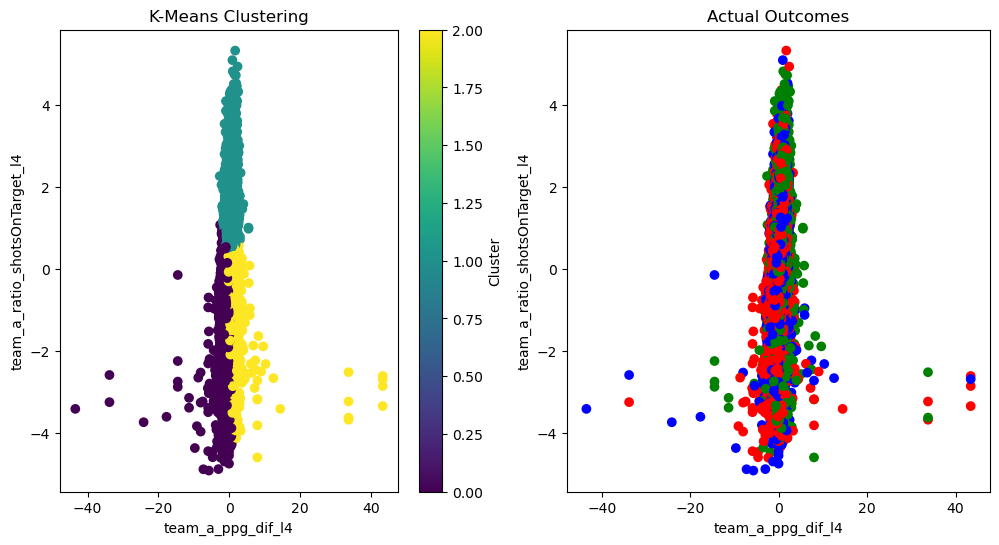

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = data[['team_b_shots_overall_l4_TSR', 'team_b_shots_average']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('team_a_ppg_dif_l4')
plt.ylabel('team_a_ratio_shotsOnTarget_l4')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
outcome_colors = {0: 'red', 1: 'blue', 2: 'green'}  # Adjust colors as needed
outcome_labels = data['Outcome'].map(outcome_colors)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=outcome_labels)
plt.title('Actual Outcomes')
plt.xlabel('team_a_ppg_dif_l4')
plt.ylabel('team_a_ratio_shotsOnTarget_l4')

plt.show()

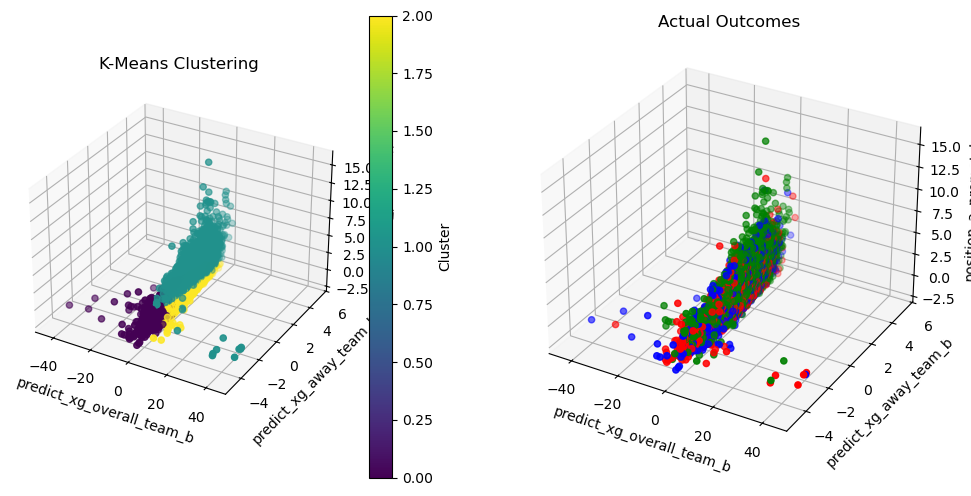

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

features = data[['team_b_shots_overall_l4_TSR', 'team_b_shots_average', 'predict_xg_overall_team_b']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=data['Cluster'], cmap='viridis')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('predict_xg_overall_team_b')
ax1.set_ylabel('predict_xg_away_team_b')
ax1.set_zlabel('position_a_prematch')
fig.colorbar(scatter1, ax=ax1, label='Cluster')

ax2 = fig.add_subplot(122, projection='3d')
outcome_colors = {0: 'red', 1: 'blue', 2: 'green'}  # Red = Team A win, Blue = Draw, Green = Team B win
outcome_labels = data['Outcome'].map(outcome_colors)
scatter2 = ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=outcome_labels)
ax2.set_title('Actual Outcomes')
ax2.set_xlabel('predict_xg_overall_team_b')
ax2.set_ylabel('predict_xg_away_team_b')
ax2.set_zlabel('position_a_prematch')

plt.show()

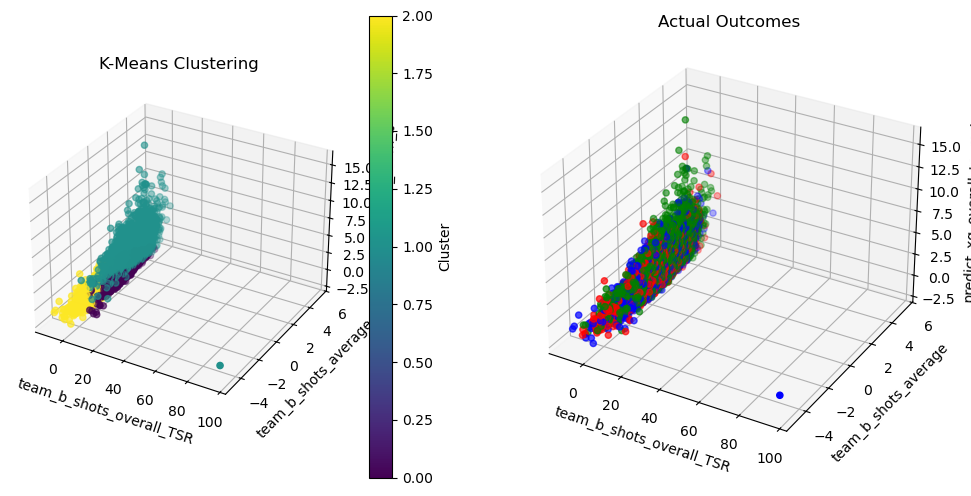

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

features = data[['team_b_shots_overall_TSR', 'team_b_shots_average', 'predict_xg_overall_team_b']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=data['Cluster'], cmap='viridis')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('team_b_shots_overall_TSR')
ax1.set_ylabel('team_b_shots_average')
ax1.set_zlabel('predict_xg_overall_team_b')
fig.colorbar(scatter1, ax=ax1, label='Cluster')

ax2 = fig.add_subplot(122, projection='3d')
outcome_colors = {0: 'red', 1: 'blue', 2: 'green'} # Red = Team A win, Blue = Draw, Green = Team B win
outcome_labels = data['Outcome'].map(outcome_colors)
scatter2 = ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=outcome_labels)
ax2.set_title('Actual Outcomes')
ax2.set_xlabel('team_b_shots_overall_TSR')
ax2.set_ylabel('team_b_shots_average')
ax2.set_zlabel('predict_xg_overall_team_b')

plt.show()